In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plane = pd.read_csv('Plane.csv')
plane

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# EDA

In [4]:
plane.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
#Mengecek apakah ada data NaN atau tidak

total = plane.isnull().sum().sort_values(ascending=False)
percent = (plane.isnull().sum()/plane.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Unnamed: 0,0,0.0
airline,0,0.0
flight,0,0.0
source_city,0,0.0
departure_time,0,0.0
stops,0,0.0
arrival_time,0,0.0
destination_city,0,0.0
class,0,0.0
duration,0,0.0


Terlihat tidak ada data kosong sehingga data bisa lanjut diolah

Median: 7425.0
Mean: 20889.660523133203
Std Dev: 22697.767366075885


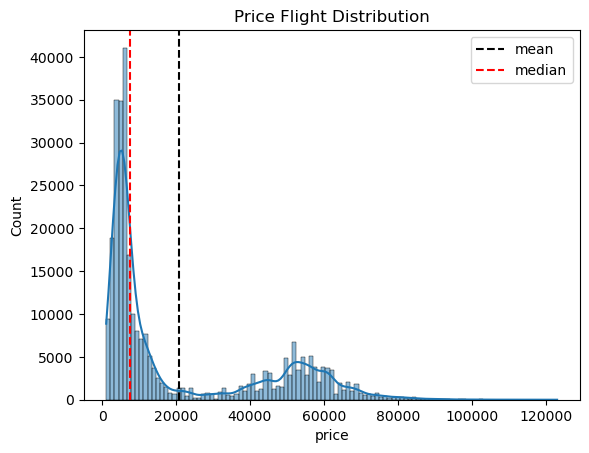

In [7]:
#Membuat grafik distribusi harga tiket

x = plane["price"]
sns.histplot(x, kde=True)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Price Flight Distribution')
plt.xlabel(x.name) 
plt.show()

**Analisis**
* Dari histogram di atas terlihat jika distribusi harga tiket sangat miring ke kanan (right-skewed) yang menunjukkan mayoritas harga tiket berkisar di nilai yang lebih rendah, dan beberapa tiket memiliki harga yang jauh lebih tinggi. Hal ini bisa dipahami karena mayoritas masyarakat pasti akan memilih tiket dengan harga lebih terjangkau.

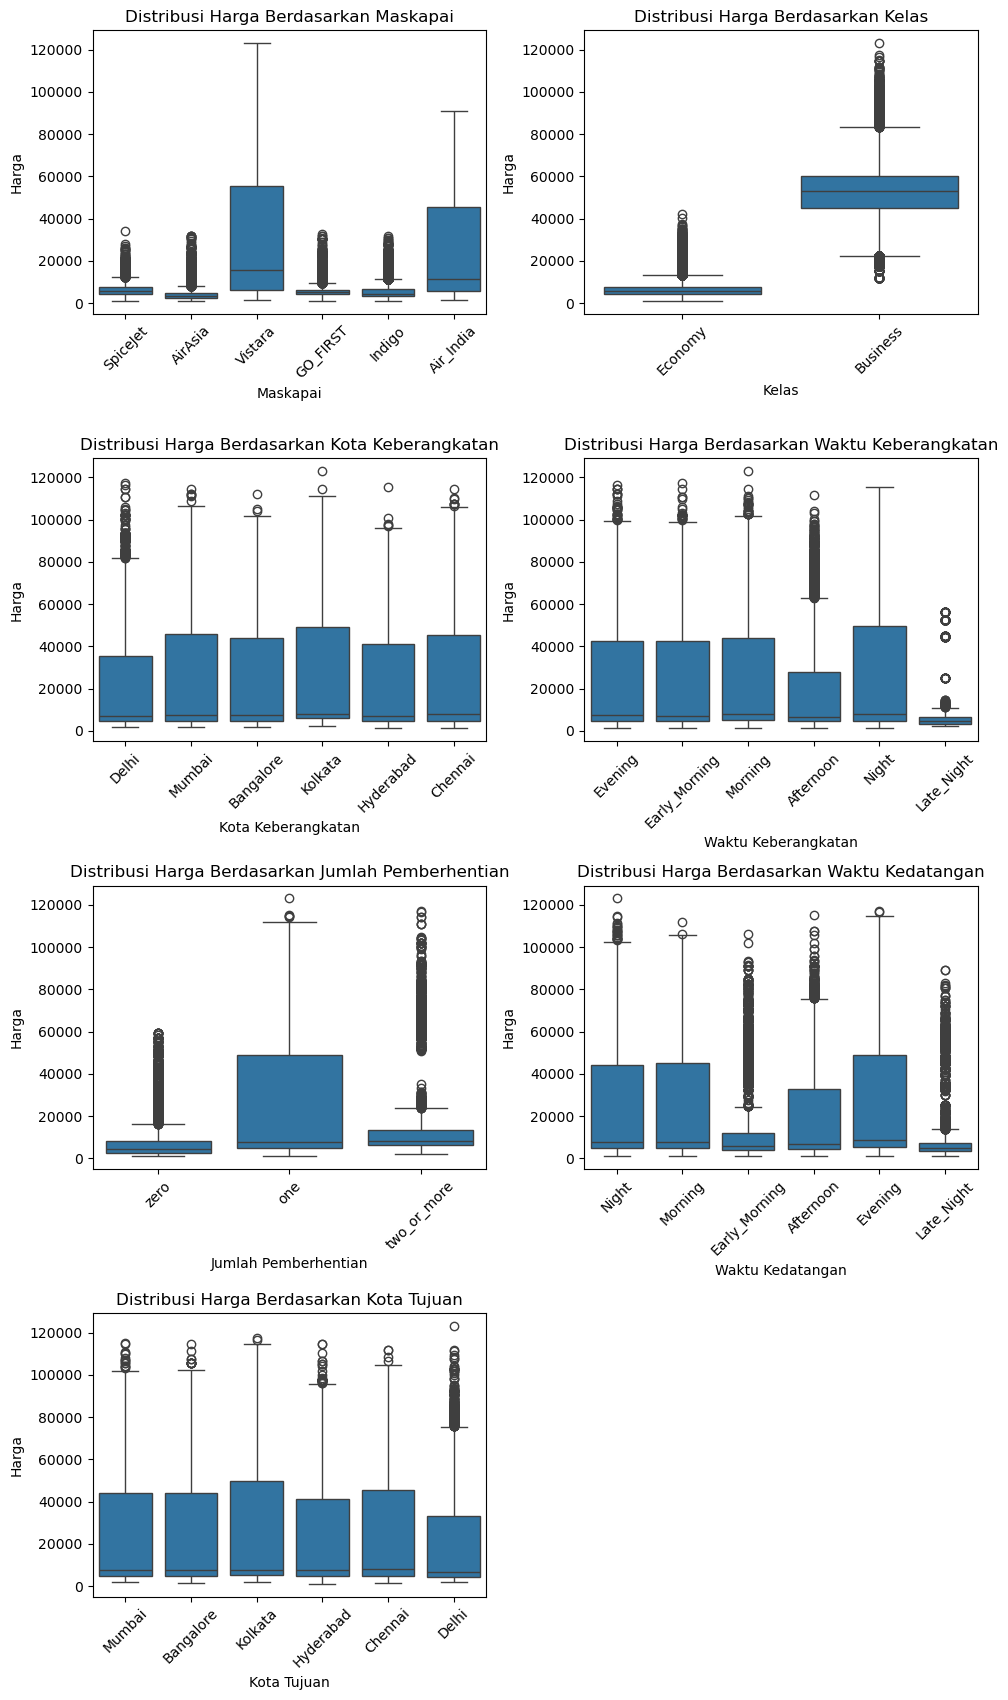

In [9]:
#Membuat grafik distribusi harga tiket berdasarkan kategori tertentu

fig, axes = plt.subplots(4, 2, figsize=(10, 18))

sns.boxplot(x='airline', y='price', data=plane, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Harga Berdasarkan Maskapai')
axes[0, 0].set_xlabel('Maskapai')
axes[0, 0].set_ylabel('Harga')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='class', y='price', data=plane, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Harga Berdasarkan Kelas')
axes[0, 1].set_xlabel('Kelas')
axes[0, 1].set_ylabel('Harga')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='source_city', y='price', data=plane, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Harga Berdasarkan Kota Keberangkatan')
axes[1, 0].set_xlabel('Kota Keberangkatan')
axes[1, 0].set_ylabel('Harga')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='departure_time', y='price', data=plane, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Harga Berdasarkan Waktu Keberangkatan')
axes[1, 1].set_xlabel('Waktu Keberangkatan')
axes[1, 1].set_ylabel('Harga')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='stops', y='price', data=plane, ax=axes[2, 0])
axes[2, 0].set_title('Distribusi Harga Berdasarkan Jumlah Pemberhentian')
axes[2, 0].set_xlabel('Jumlah Pemberhentian')
axes[2, 0].set_ylabel('Harga')
axes[2, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='arrival_time', y='price', data=plane, ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Harga Berdasarkan Waktu Kedatangan')
axes[2, 1].set_xlabel('Waktu Kedatangan')
axes[2, 1].set_ylabel('Harga')
axes[2, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='destination_city', y='price', data=plane, ax=axes[3, 0])
axes[3, 0].set_title('Distribusi Harga Berdasarkan Kota Tujuan')
axes[3, 0].set_xlabel('Kota Tujuan')
axes[3, 0].set_ylabel('Harga')
axes[3, 0].tick_params(axis='x', rotation=45)

axes[3, 1].axis('off')

# Mengatur layout agar lebih rapi
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menyesuaikan layout dan memberi ruang untuk judul utama
plt.show()

**Analisis**
* Boxplot di atas menunjukkan persebaran harga tiket dari masing-masing kategori
* Dapat dilihat jika perbedaan rentang harga tiket paling terlihat pada kelas pesawat yang berbeda
* Maskapai pesawat dan Jumlah pemberhentian pesawat juga menunjukkan perbedaan rentang harga namun tidak sejauh kelas pesawat. Sedangkan kategori lainnya tidak menunjukkan perbedaan rentang harga yang signifikan. 

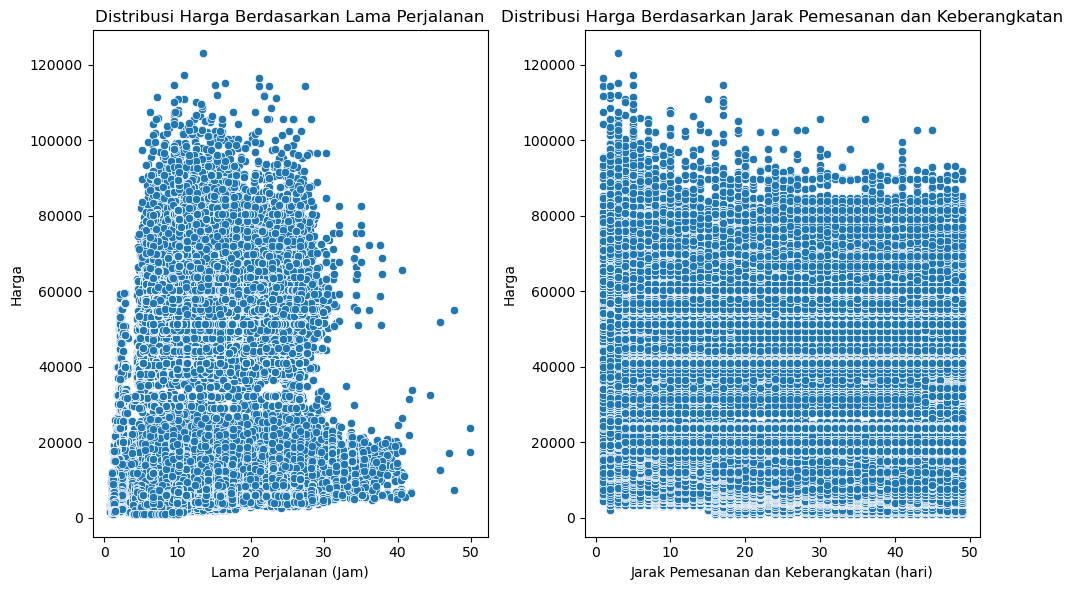

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.scatterplot(y="price", x="duration", data=plane, ax=axes[0])
axes[0].set_title('Distribusi Harga Berdasarkan Lama Perjalanan')
axes[0].set_xlabel('Lama Perjalanan (Jam)')
axes[0].set_ylabel('Harga')

sns.scatterplot(y="price", x="days_left", data=plane, ax=axes[1])
axes[1].set_title('Distribusi Harga Berdasarkan Jarak Pemesanan dan Keberangkatan')
axes[1].set_xlabel('Jarak Pemesanan dan Keberangkatan (hari)')
axes[1].set_ylabel('Harga')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

lb = LabelEncoder()
plane.drop(['Unnamed: 0'],axis=1, inplace = True)
plane.drop(['flight'],axis=1, inplace = True)
plane['airline'] = lb.fit_transform(plane['airline'])
plane['source_city'] = lb.fit_transform(plane['source_city'])
plane['departure_time'] = lb.fit_transform(plane['departure_time'])
plane['stops'] = lb.fit_transform(plane['stops'])
plane['arrival_time'] = lb.fit_transform(plane['arrival_time'])
plane['destination_city'] = lb.fit_transform(plane['destination_city'])
plane['class'] = lb.fit_transform(plane['class'])

plane

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


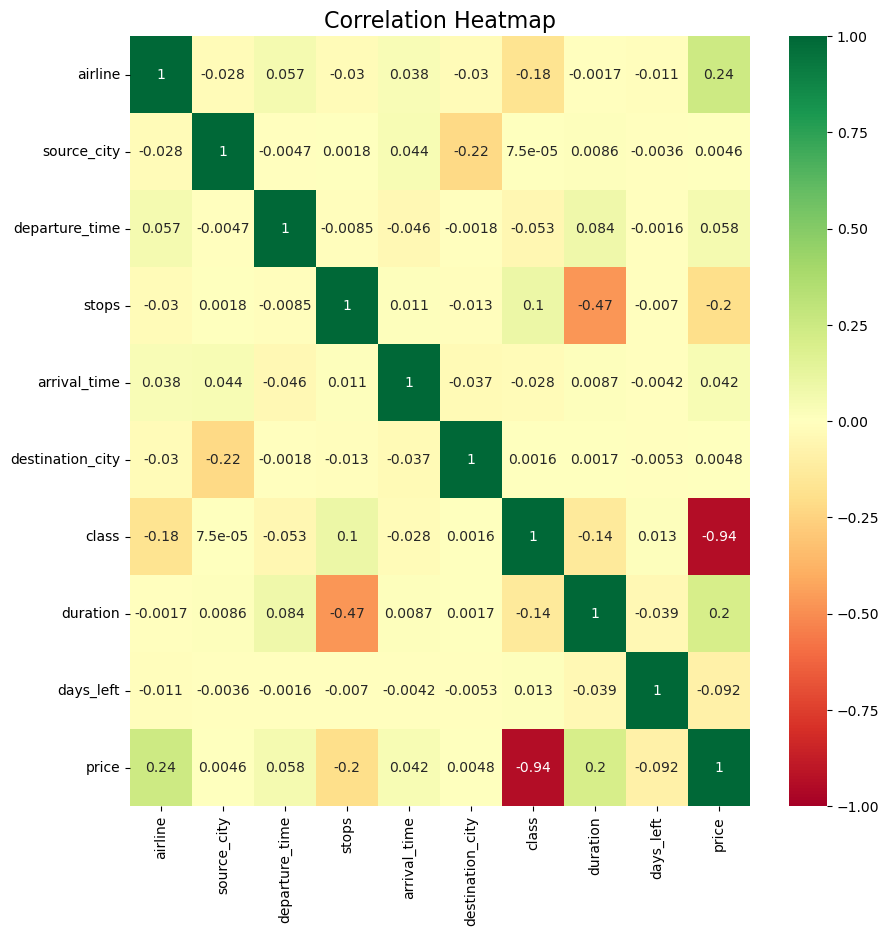

In [13]:
#Membuat Correlation Heatmap

plt.figure(figsize=(10,10))
corr = plane.corr()
corr.index = plane.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Analisis**
* Terlihat kategori yang memengaruhi harga pesawat adalah kelas pesawat dengan korelasi sebesar -0.94. Hal ini sesuai dengan grafik boxplot sebelumnya yang menunjukkan adanya perbedaan rentang harga yang signifikan antara kelas ekonomi dan bisnis.
* Selain kelas pesawat tidak ada yang memengaruhi harga pesawat dengan signifikan karena korelasinya di bawah 0.5 semua yang menunjukkan korelasinya lemah.

# Modelling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plane[['airline','source_city','departure_time','stops',
       'arrival_time','destination_city','class','duration','days_left','price']] = scaler.fit_transform(plane[['airline','source_city','departure_time','stops','arrival_time',
                                                                                                                'destination_city','class','duration','days_left','price']])
plane

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.397531,-1.843875,-0.658068
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875,-0.658068
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.397531,-1.843875,-0.657936
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.386407,-1.843875,-0.657980
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875,-0.657980
...,...,...,...,...,...,...,...,...,...,...
300148,1.033746,-0.900576,0.902176,-0.426792,-0.616701,0.235992,-1.486822,-0.297695,1.695692,2.131285
300149,1.033746,-0.900576,-1.377971,-0.426792,1.105790,0.235992,-1.486822,-0.250421,1.695692,2.476694
300150,1.033746,-0.900576,-0.807934,-0.426792,1.105790,0.235992,-1.486822,0.223718,1.695692,2.564545
300151,1.033746,-0.900576,-0.807934,-0.426792,-0.616701,0.235992,-1.486822,-0.308819,1.695692,2.674071


In [18]:
#spliting data
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling

X = plane.iloc[:,0:9]
Y = plane.iloc[:,9]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (240122, 9)
Shape of X_test: (60031, 9)
Shape of y_train: (240122,)
Shape of y_test: (60031,)


1. KNN

In [20]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

2. Decision Tree

In [22]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

3. Random Forest

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Model

In [26]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R^2: {r2:.2f}")
    print()

# Evaluasi KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# Evaluasi Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Evaluasi Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

K-Nearest Neighbors Performance:
  MAE: 0.08
  MSE: 0.03
  R^2: 0.97

Decision Tree Performance:
  MAE: 0.05
  MSE: 0.02
  R^2: 0.98

Random Forest Performance:
  MAE: 0.05
  MSE: 0.01
  R^2: 0.99



**Analisis**
* Dari hasik evaluasi terlihat model Random Forest memiliki hasil evaluasi terbaik sehingga model inilah yang akan digunakan

# Improvement Model

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=0)
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                               n_iter=50, cv=3, verbose=2, random_state=0, n_jobs=-1)
rf_random.fit(X_train, y_train)

print("Best parameters found: ", rf_random.best_params_)
print("Best R-squared score:", rf_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\sucir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
39 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sucir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sucir\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sucir\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sucir\anaconda3\Lib\site-packages

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R-squared score: 0.9841576433490596


In [31]:
# Prediksi dengan model terbaik dari RandomizedSearchCV
y_pred_rf_best = rf_random.best_estimator_.predict(X_test)

evaluate_model(y_test, y_pred_rf_best, "Tuned Random Forest")

Tuned Random Forest Performance:
  MAE: 0.06
  MSE: 0.01
  R^2: 0.99



**Analisis**
* Dari hasil evaluasi model setelah dilakukan improvement, hasilnya tidak berbeda jauh dengan sebelum dilakukan improvement bahkan dari nilai MAE terlihat model sebelum improvement sedikit lebih akurat. Oleh karena itu model yang akan dipilih adalah model Random Forest sebelum dilakukan improvement

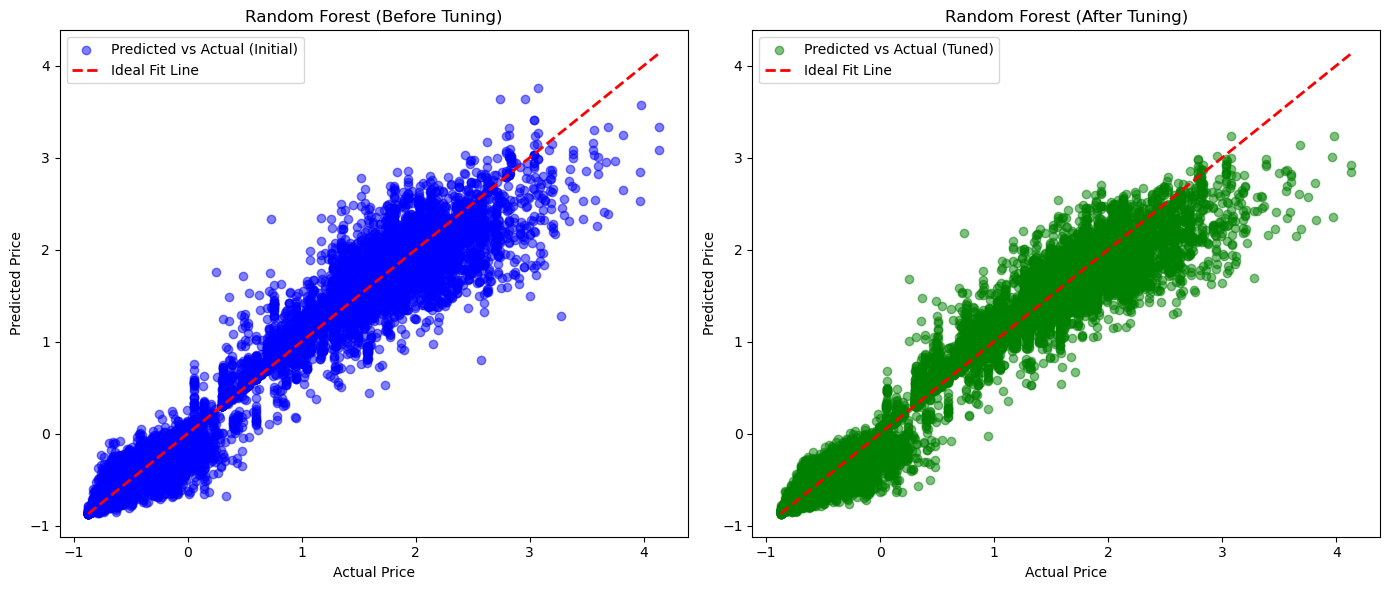

In [33]:
plt.figure(figsize=(14, 6))

# Grafik 1: Sebelum Tuning
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", label="Predicted vs Actual (Initial)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest (Before Tuning)")
plt.legend()

# Grafik 2: Setelah Tuning
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_best, alpha=0.5, color="green", label="Predicted vs Actual (Tuned)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest (After Tuning)")
plt.legend()

plt.tight_layout()
plt.show()

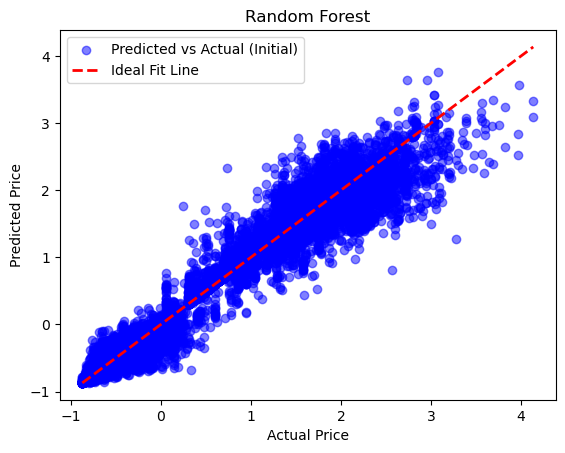

In [34]:
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", label="Predicted vs Actual (Initial)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest")
plt.legend()
plt.show()

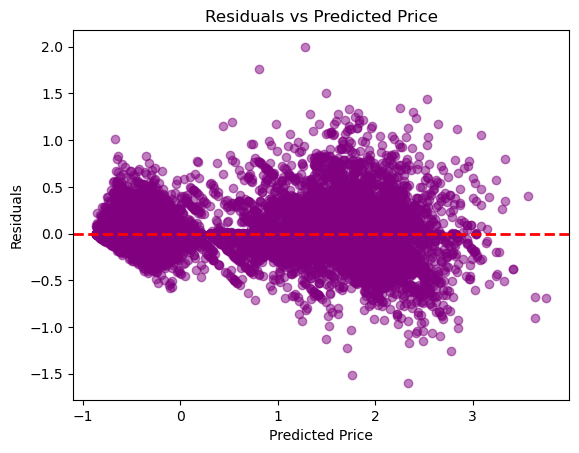

In [60]:
residuals = y_test - y_pred_rf

plt.scatter(y_pred_rf, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()
